* Pandas.DataFrame allows to properly manage the mapping from the 3-state pattern at time t to the new state at t+1
* Boundary conditions: I set an augmented chain with positions x=[-tmax-2,...,0,...,tmax+2]

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
rule = 90
rule_in_binary = '{0:08b}'.format(rule)
rule_in_binary_rev = ''.join(reversed(rule_in_binary))

dfObj = pd.DataFrame( [[ '{0:03b}'.format(i), rule_in_binary_rev[i] ] for i in range(2**3)], columns=['current','new']) 
print( dfObj.T )

           0    1    2    3    4    5    6    7
current  000  001  010  011  100  101  110  111
new        0    1    0    1    1    0    1    0


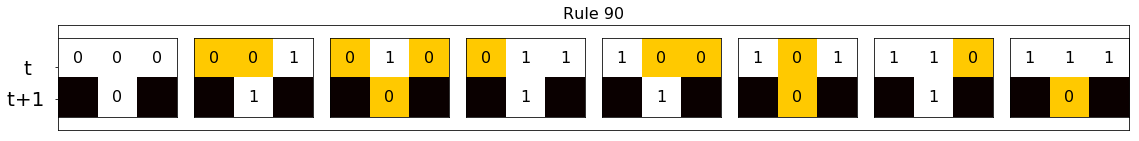

In [3]:
fig=plt.figure(figsize=(16, 1.8))
columns = 8  ; rows = 1

plt.title('Rule %d'%(rule) , fontsize=16)
plt.xticks([]) 
plt.yticks((0.3, 0.6), ( 't+1 ', 't   '), color='k', size=20)

for i in range(1, columns*rows +1):
    
    arrstr = '{0:03b}'.format(i-1)
    listcurr = [int(ch) for ch in arrstr]  #  string ---> list of int        
    listnext = [-2,int( rule_in_binary_rev[i-1]),-2] # workaround: I use -2 just to put a different color later
    data = [ listcurr,listnext ]
    img = np.array( data, ndmin=2) 

    fig.add_subplot(rows, columns, i)    
    plt.imshow(img,cmap=cm.hot)
    plt.xticks([])
    plt.yticks([])
    
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img[y, x]>-2:
                plt.text(x, y, '%d' % img[y, x], fontsize=16,
                 horizontalalignment='center',verticalalignment='center')
                 
                 
plt.tight_layout(True)    

In [4]:
def curr_to_next():    
    
    status2 = [0] # Left boundary
    
    for Ix in range(1,len(xpos)-1,1):
        # build the neighborhood
        arrint = [status[Ix-1],status[Ix],status[Ix+1]]
        # Convert int to string
        currstr="".join([str(a) for a in arrint]) 
        # Search the current pattern inside the dataframe with all the patterns
        dfaux = dfObj.loc[ dfObj['current']==currstr ]             
        # Include in the new list
        status2.append( int(dfaux['new']) )
        
    status2.append( 0 )  # Right boundary   

    return np.array(status2, dtype=np.int32)

In [5]:
tmax = 50

xpos = np.arange(-tmax-1, tmax+2, 1) # [-t-2,...,t+2], to avoid boundary issues I set an augmented chain 
status = np.zeros(len(xpos), dtype=np.int32)

# t=0
Ixc = xpos.size//2 # Index of the central position
status[Ixc]=1

# t>0
lpx = [ list(status) ] 
for t in np.arange(1,tmax,1):    #  size([0,1,...,t]) = t+1             
    status = curr_to_next()
    lpx.append( list(status) ) 

Text(0.5,1,'Rule 90')

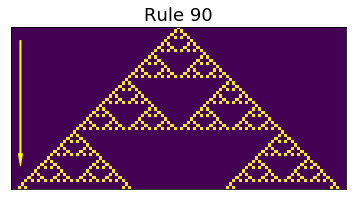

In [6]:
fig, ax = plt.subplots( figsize=(6,3) )
img = np.array( lpx, ndmin=2) 
plt.imshow( img, extent=[-len(xpos)/2,len(xpos)/2,tmax,0])
plt.xticks([]),plt.yticks([])
ax.annotate('', xy=(-tmax+1, tmax-3), xytext=(-tmax+1, 0), size=14,color='yellow',
            arrowprops=dict(color='yellow', shrink=0.09,width=1,headwidth=4) )
plt.title('Rule %d'%(rule) , fontsize=18)